In [7]:
from collections import namedtuple
class P3(namedtuple('P3', ['x', 'y', 'z'])):
    __slots__ = ()
    def __new__(self, x, y, z):
        return super(P3, self).__new__(self, float(x), float(y), float(z))
    def __repr__(self):
        return "P3(%s, %s, %s)" % (self.x, self.y, self.z)
    def __add__(self, a):
        return P3(self.x + a.x, self.y + a.y, self.z + a.z)
    def __sub__(self, a):
        return P3(self.x - a.x, self.y - a.y, self.z - a.z)
    def __mul__(self, a):
        return P3(self.x*a, self.y*a, self.z*a)
    def __neg__(self):
        return P3(-self.x, -self.y, -self.z)
    def __rmul__(self, a):
        raise TypeError
    def Len(self):
        return math.sqrt(self.Lensq())


In [8]:
tableA = """PS-30	1029.233	892.899	89.966
PS-32	1013.393	901.363	88.609
PS-33	1002.611	893.677	87.161
PS-34	995.771	864.041	87.84
PS-40	989.341	808.613	88.165
PS-41	983.221	800.487	88.101
PS-42	966.744	798.069	87.665
PS-43	949.726	802.082	87.44
PS-44	936.758	810.914	89.936
PS-45	929.886	811.71	89.923
PS-46	931.155	808.224	88.743
PS-47	948.513	778.756	88.232
PS-48	969.873	741.56	88.518"""

tableB = """RC-3	-0.8719115	-0.1605895	0.1528525
PS-30	-9.133232	-3.872512	2.0578425
PS-32	-21.4957275	9.1209335	0.4676555
PS-33	-34.132475	5.2050285	-0.976403
HL-2	-45.039895	-10.5937175	-0.7546855
PS-34	-49.847128	-20.815806	-0.235636
HL-3	-51.003669	-23.428265	-1.159484
HL-4	-61.762859	-45.1562445	-1.0792755
PS-40	-73.2166535	-71.434395	0.161769
HL-5	-76.278865	-73.036699	-0.491414
PS-41	-81.552117	-77.2180285	0.113492
PS-42	-97.980248	-74.3958075	-0.263235
HL-6	-116.143945	-59.649841	-0.449733
HL-7	-127.26588	-53.486088	-0.4225325
PS-47	-121.1764025	-86.9554885	0.371472
HL-8	-116.5672665	-111.969516	0.015746
PS-48	-112.3144305	-128.944153	0.469719
PS-U11	-93.812492	-145.003006	0.51986
HL-11	-112.14007	-134.9020655	0.2461755
PS-U12	-120.452219	-130.5366	0.040576"""




In [17]:
def convtable(table):
    return dict((k[0], P3(float(k[1]),float(k[2]),float(k[3])))  for k in (l.split()  for l in table.split("\n")))
ptsA = convtable(tableA)
ptsB = convtable(tableB)
ptsA

{'PS-30': P3(1029.233, 892.899, 89.966),
 'PS-32': P3(1013.393, 901.363, 88.609),
 'PS-33': P3(1002.611, 893.677, 87.161),
 'PS-34': P3(995.771, 864.041, 87.84),
 'PS-40': P3(989.341, 808.613, 88.165),
 'PS-41': P3(983.221, 800.487, 88.101),
 'PS-42': P3(966.744, 798.069, 87.665),
 'PS-43': P3(949.726, 802.082, 87.44),
 'PS-44': P3(936.758, 810.914, 89.936),
 'PS-45': P3(929.886, 811.71, 89.923),
 'PS-46': P3(931.155, 808.224, 88.743),
 'PS-47': P3(948.513, 778.756, 88.232),
 'PS-48': P3(969.873, 741.56, 88.518)}

In [19]:
avgA = sum(ptsA.values(), P3(0,0,0))*(1.0/len(ptsA))
avgB = sum(ptsB.values(), P3(0,0,0))*(1.0/len(ptsB))
vecBA = avgA - avgB
vecBA

P3(1048.8959127615385, 885.8920276403848, 88.54530038653847)

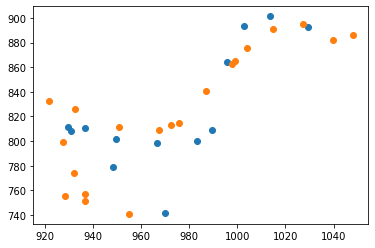

In [20]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.scatter([p[0] for p in ptsA.values()], [p[1] for p in ptsA.values()])
plt.scatter([p[0]+vecBA[0] for p in ptsB.values()], [p[1]+vecBA[1] for p in ptsB.values()])
